# **Random Forest**

![image.png](https://av-eks-blogoptimized.s3.amazonaws.com/4661536426211ba43ea612c8e1a6a1ed4550721164.png)

#### **Bagging, also known as Bootstrap Aggregation, serves as the ensemble technique in the Random Forest algorithm**

**1. Selection of Subset:** Bagging starts by choosing a random sample, or subset, from the entire dataset.

**2. Bootstrap Sampling:** Each model is then created from these samples, called Bootstrap Samples, which are taken from the original data with replacement. This process is known as row sampling.

**3. Bootstrapping:** The step of row sampling with replacement is referred to as bootstrapping.

**4. Independent Model Training:** Each model is trained independently on its corresponding Bootstrap Sample. This training process generates results for each model.

**5. Majority Voting:** The final output is determined by combining the results of all models through majority voting. The most commonly predicted outcome among the models is selected.

**6. Aggregation:** This step, which involves combining all the results and generating the final output based on majority voting, is known as aggregation.

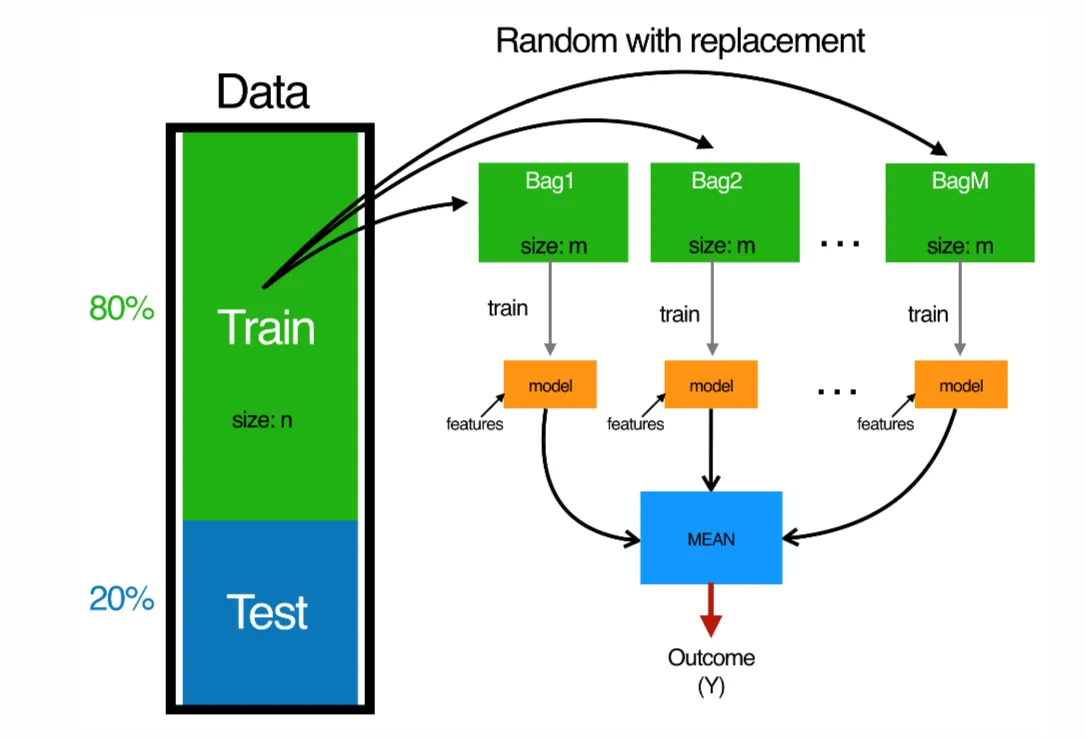


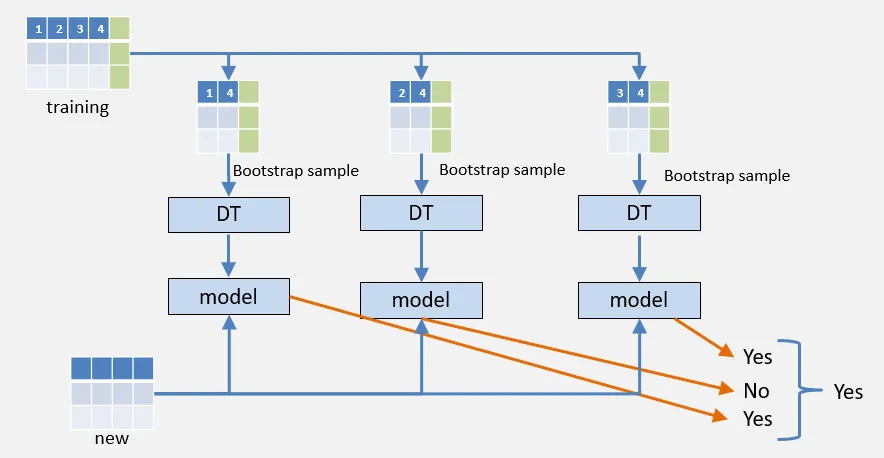

### **Out of Bag(OOB) Samples**

The number of observations in the training set is denoted as $n$.

Size of Bag1 = $n$

Probability of an observation being selected in a draw = $\frac{1}{n}$

Probability of an observation not being selected in a draw = $1 - \frac{1}{n}$

Number of draws = Size of Bag = $n$

Therefore, the probability of an observation not being selected in all the draws for Bag1 is given by $\left(1 - \frac{1}{n}\right)^n$.

When $n$ tends to infinity, 

$$\lim_{{n \to \infty}} \left(1 - \frac{1}{n}\right)^n = \frac{1}{e}$$

this value tends to $\frac{1}{e} = 36.8\%$.

Probability of an observation making it into the bag after $n$ draws is:

\[
1 - 36.8\% = 63.2\%
\]

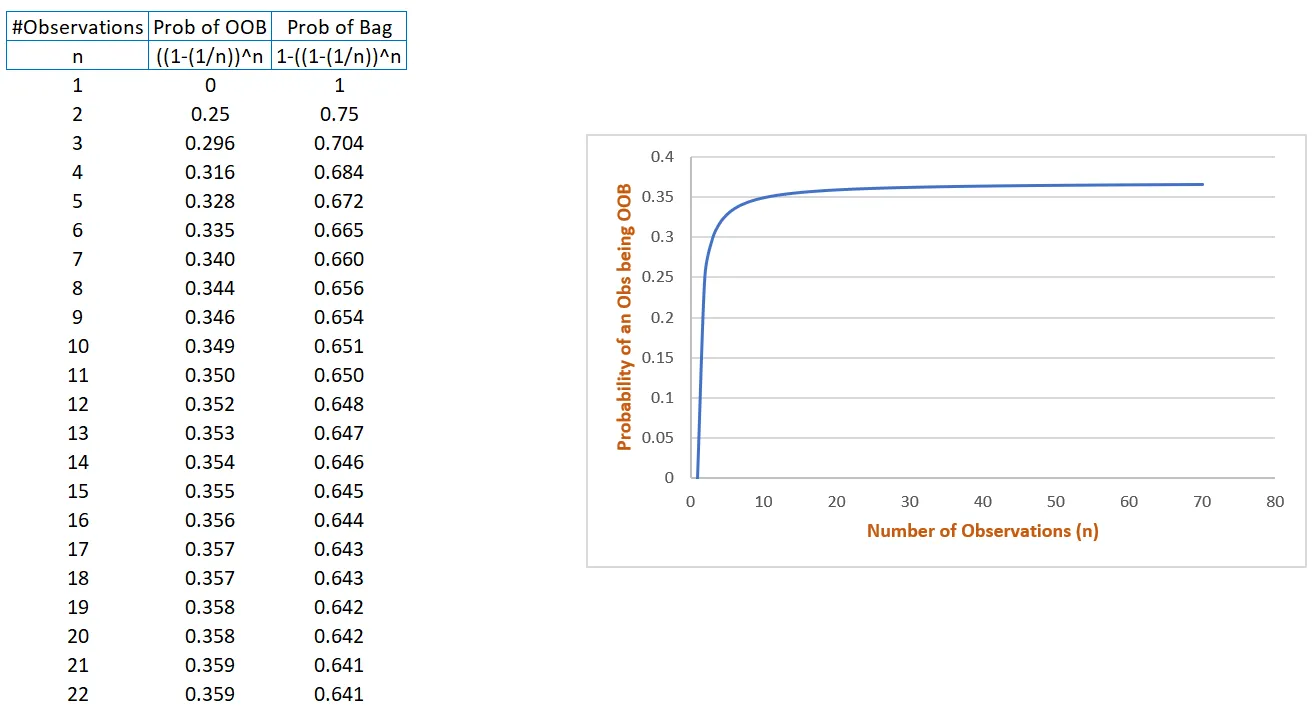


### **OOB_Score is a very powerful Validation Technique used especially for the Random Forest algorithm for least Variance results.**

### **1. The OOB_score is computed as the number of correctly predicted rows from the out-of-bag sample.**

### **2. OOB Error is the number of wrongly classifying the OOB Sample.**


**While using the cross-validation technique, every validation set has already been seen or used in training by a few decision trees and hence there is a leakage of data**, therefore more variance. 

**But, OOB_Score prevents leakage and gives a better model with low variance, so we use OOB_score for validating the model.**


### **Advantages of using OOB_Score**

**No leakage of data:** Since you validate the model on the OOB Sample in Python, which means you haven’t used the data in any way while training the model, there isn’t any leakage of data and this ensures a better predictive model.

**Less Variance :**  [More Variance ~ Overfitting due to more training score and less testing score]. Since OOB_Score generalization ensures no leakage, so there is no over-fitting of the data and hence least variance.

```
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, 
                                              criterion='gini', 
                                              max_depth=None, 
                                              min_samples_split=2, 
                                              min_samples_leaf=1,
                                               min_weight_fraction_leaf=0.0, 
                                               max_features='sqrt', 
                                               max_leaf_nodes=None, 
                                               min_impurity_decrease=0.0, 
                                               bootstrap=True, 
                                               oob_score=False, 
                                               n_jobs=None, 
                                               random_state=None, 
                                               verbose=0, 
                                               warm_start=False, class_weight=None, 
                                               ccp_alpha=0.0, max_samples=None, 
                                               monotonic_cst=None)
```

### **Hyperparameters to Increase the Predictive Power**

**n_estimators:** Number of trees the algorithm builds before averaging the predictions.

**max_features:** Maximum number of features random forest considers splitting a node.

**mini_sample_leaf:** Determines the minimum number of leaves required to split an internal node.

**criterion:** How to split the node in each tree? (Entropy/Gini impurity/Log Loss)

**max_leaf_nodes:** Maximum leaf nodes in each tree


### **Hyperparameters to Increase the Speed**

**n_jobs:** it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor, but if the value is -1, there is no limit.

**random_state:** controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and has been given the same hyperparameters and training data.

**oob_score:** OOB means out of the bag. It is a random forest cross-validation method. In this, one-third of the sample is not used to train the data; instead used to evaluate its performance. These samples are called out-of-bag samples.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

C:\Users\sushovan.saha\AppData\Local\Temp\ipykernel_22176\3453046906.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
X,y = load_breast_cancer(return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [5]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [6]:
classifier_rf.oob_score_

0.957286432160804

In [7]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [8]:
grid_search.best_score_

0.9498232323232323

In [9]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

[Text(0.65625, 0.9375, 'x[25] <= 0.341\ngini = 0.443\nsamples = 247\nvalue = [132, 266]'),
 Text(0.4375, 0.8125, 'x[2] <= 106.85\ngini = 0.315\nsamples = 184\nvalue = [61, 250]'),
 Text(0.3125, 0.6875, 'x[20] <= 17.54\ngini = 0.107\nsamples = 156\nvalue = [15, 249]'),
 Text(0.25, 0.5625, 'x[6] <= 0.098\ngini = 0.068\nsamples = 149\nvalue = [9, 246]'),
 Text(0.125, 0.4375, 'x[20] <= 14.485\ngini = 0.033\nsamples = 138\nvalue = [4, 237]'),
 Text(0.0625, 0.3125, 'gini = 0.0\nsamples = 99\nvalue = [0, 173]'),
 Text(0.1875, 0.3125, 'x[11] <= 1.269\ngini = 0.111\nsamples = 39\nvalue = [4, 64]'),
 Text(0.125, 0.1875, 'x[2] <= 86.695\ngini = 0.036\nsamples = 32\nvalue = [1, 53]'),
 Text(0.0625, 0.0625, 'gini = 0.142\nsamples = 7\nvalue = [1, 12]'),
 Text(0.1875, 0.0625, 'gini = 0.0\nsamples = 25\nvalue = [0, 41]'),
 Text(0.25, 0.1875, 'gini = 0.337\nsamples = 7\nvalue = [3, 11]'),
 Text(0.375, 0.4375, 'x[29] <= 0.085\ngini = 0.459\nsamples = 11\nvalue = [5, 9]'),
 Text(0.3125, 0.3125, 'gini = 

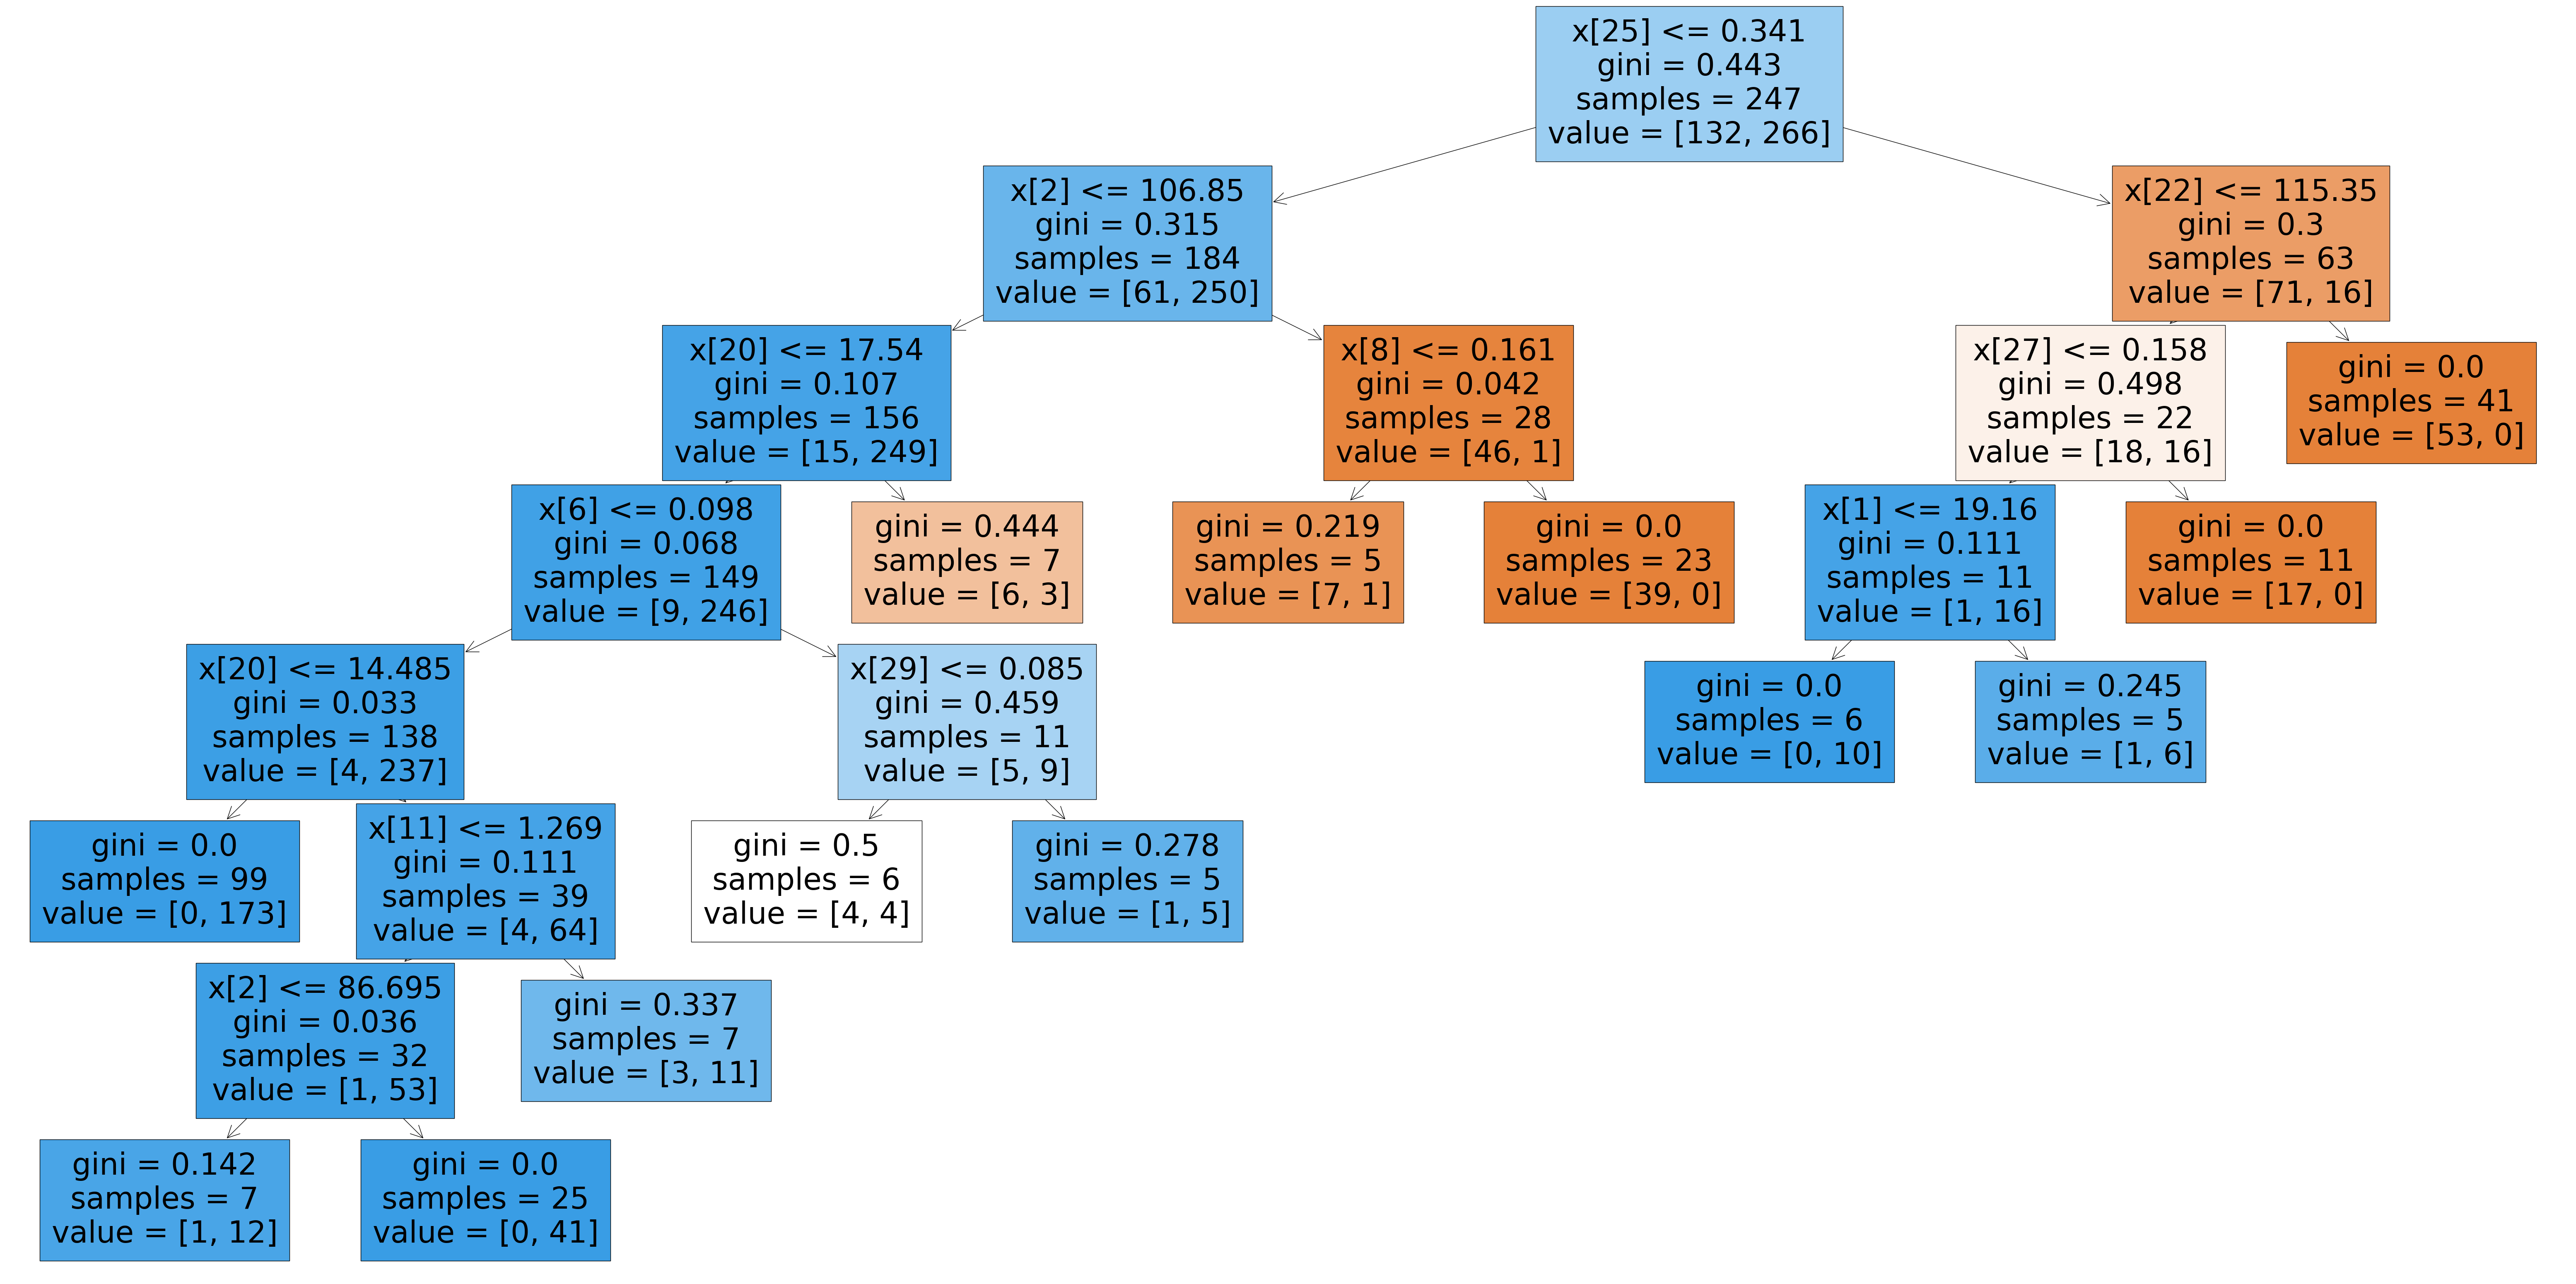

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5],filled=True)

[Text(0.5833333333333334, 0.9285714285714286, 'x[0] <= 14.15\ngini = 0.487\nsamples = 250\nvalue = [167, 231]'),
 Text(0.35714285714285715, 0.7857142857142857, 'x[26] <= 0.362\ngini = 0.272\nsamples = 161\nvalue = [41, 211]'),
 Text(0.19047619047619047, 0.6428571428571429, 'x[12] <= 2.81\ngini = 0.065\nsamples = 137\nvalue = [7.0, 200.0]'),
 Text(0.09523809523809523, 0.5, 'x[11] <= 1.37\ngini = 0.011\nsamples = 122\nvalue = [1, 182]'),
 Text(0.047619047619047616, 0.35714285714285715, 'gini = 0.0\nsamples = 90\nvalue = [0, 138]'),
 Text(0.14285714285714285, 0.35714285714285715, 'x[24] <= 0.142\ngini = 0.043\nsamples = 32\nvalue = [1, 44]'),
 Text(0.09523809523809523, 0.21428571428571427, 'gini = 0.0\nsamples = 22\nvalue = [0, 32]'),
 Text(0.19047619047619047, 0.21428571428571427, 'x[8] <= 0.182\ngini = 0.142\nsamples = 10\nvalue = [1, 12]'),
 Text(0.14285714285714285, 0.07142857142857142, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.23809523809523808, 0.07142857142857142, 'gini 

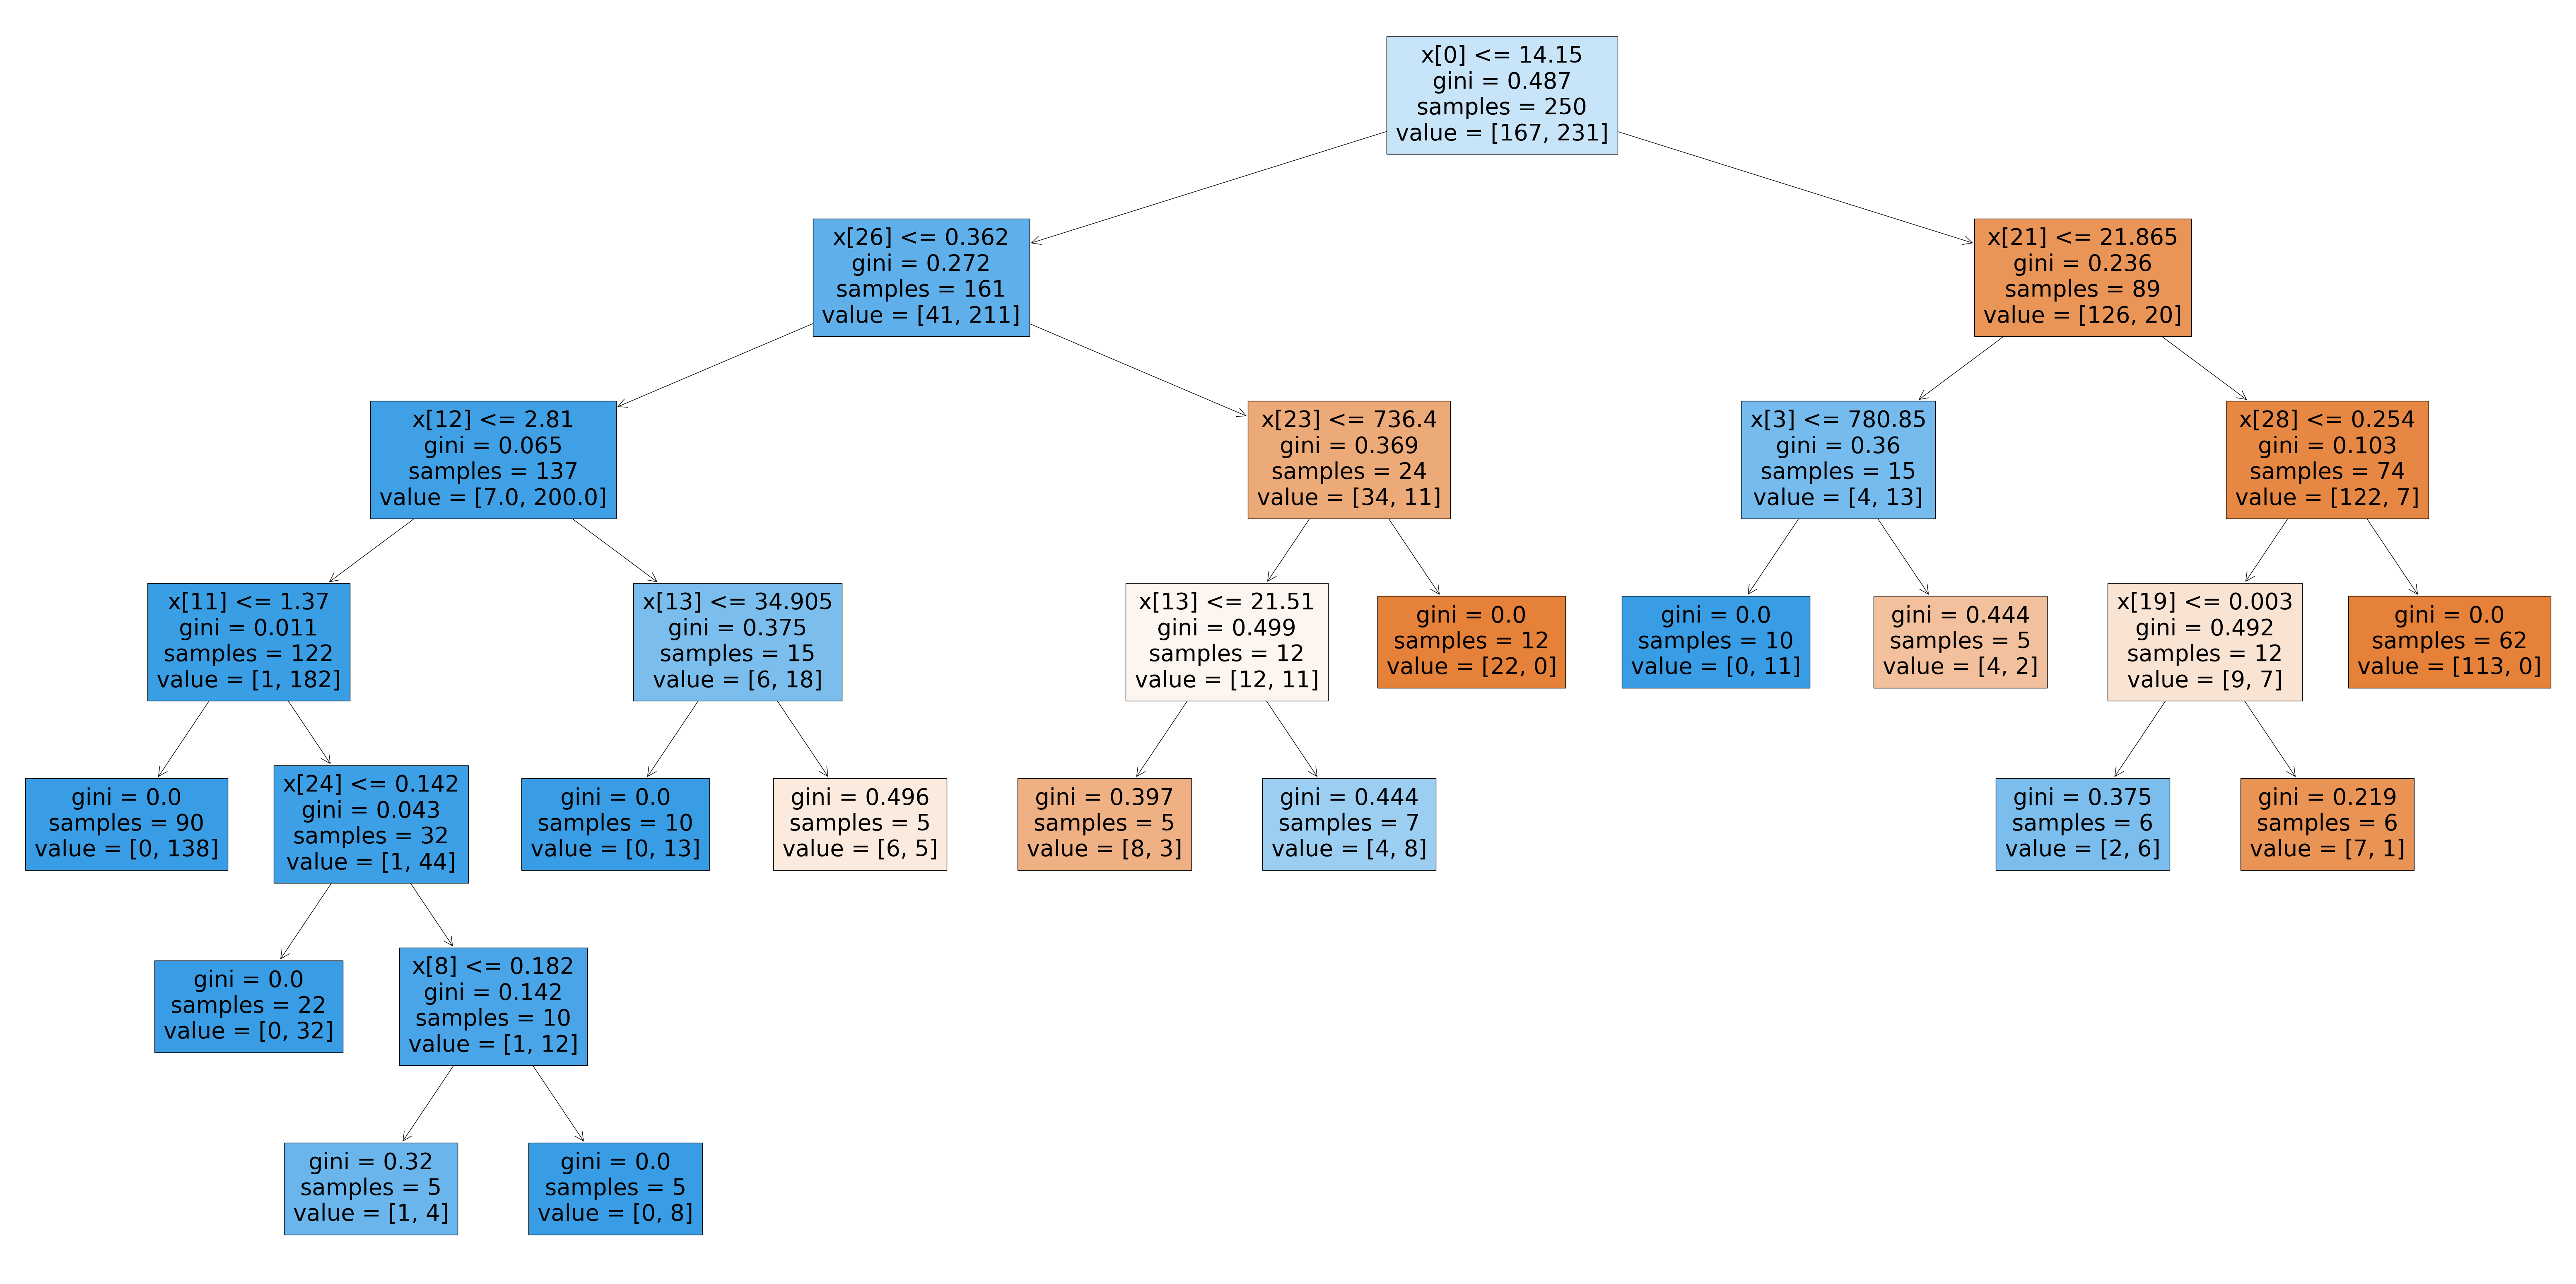

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7],filled=True)

In [13]:
rf_best.feature_importances_

array([0.05383061, 0.01032863, 0.10729129, 0.02385672, 0.00215312,
       0.        , 0.00269961, 0.10188862, 0.00027741, 0.00316153,
       0.01163739, 0.00068268, 0.00151174, 0.0699136 , 0.00438042,
       0.        , 0.00426131, 0.00283857, 0.00261453, 0.00335387,
       0.11229261, 0.01632565, 0.02229379, 0.09110058, 0.0053648 ,
       0.03611814, 0.09086192, 0.20931024, 0.00694288, 0.00270776])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

### **Advantages**
1. It can be used in classification and regression problems.

2. It solves the problem of overfitting as output is based on majority voting or averaging.

3. It performs well even if the data contains null/missing values. Each decision tree created is independent of the other; thus, it shows the property of parallelization.

4. It is highly stable as the average answers given by a large number of trees are taken.

5. It maintains diversity as all the attributes are not considered while making each decision tree though it is not true in all cases.

6. It is immune to the curse of dimensionality. Since each tree does not consider all the attributes, feature space is reduced.

7. We don’t have to segregate data into train and test as there will always be 30% of the data, which is not seen by the decision tree made out of bootstrap.

### **Disadvantages**

1. Random forest is highly complex compared to decision trees, where decisions can be made by following the path of the tree.

2. Training time is more than other models due to its complexity. Whenever it has to make a prediction, each decision tree has to generate output for the given input data.
